# Training a BERT Model for Moroccan Arabic (Darija)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/1337-Artificial-Intelligence/hackai-2025/blob/main/new_notebooks/embedding_mlm_train_bert_goudma.ipynb)

In this notebook, we'll learn how to train a BERT model specifically for Moroccan Arabic (Darija). This is important because:
- Pre-trained models often don't work well with Darija
- We can create a model that better understands our local language
- It's a great way to learn about how language models work

* **What is Masked Language Modeling ?**
> **Masked language modeling** predicts a masked token in a sequence, and the model can attend to tokens bidirectionally. This means the model has full access to the tokens on the left and right. Masked language modeling is great for tasks that require a good contextual understanding of an entire sequence. BERT is an example of a masked language model.
<img src="https://postimage.me/images/2025/05/21/image8226af2f37815b86.png" width=600 />

 * **How can Masked Language Modeling be used in transfer learning for downstream NLP tasks?**

> Once pretrained, these models can be fine-tuned on specific downstream NLP tasks, even with relatively small labeled datasets. The idea is that the model already understands language patterns, so it can adapt quickly to new tasks.
<center>

<img src="https://postimage.me/images/2025/05/21/imageff22c73db27b5ec2.png" width=600 />
</center>

* ***BERT (Bidirectional encoder representations from transformers)***

> BERT inspired from the Transformer architecture introduced in "Attention is all you need", to become an encoder-only transformer that can produce meaningful representations and understand language.

> In the pretraining phase, BERT is trained to learn:
* **Masked Language Modeling**: is to predict masked words in a sentence (I [MASKED] this book before -> read)



* **Steps To Get Your BERT Model**
  - **RPT – Regular Pretraining (i.e., From Scratch)**

    * **Train a BERT model from scratch**, starting with **randomly initialized weights**.
    * Use **your own corpus** and perform MLM from the beginning.
    * **Goal**: Create a completely custom model tailored to a specific domain or language.
    * **Advantage**: Maximum control and domain alignment.
    * **Downside**: Requires huge amounts of data and computational resources.  

  - **CPT – Continued Pretraining (also called Domain-Adaptive Pretraining)**

    * **Start from** a general-purpose pretrained BERT model.
    * **Continue training** on your **own unlabeled data** using the same **Masked Language Modeling (MLM)** objective.
    * **Goal**: Adapt the model to your domain's vocabulary and style (e.g., medical, legal, scientific text).
    * **Advantage**: Fast and resource-efficient since you're not starting from scratch.

<center>

<img src="https://postimage.me/images/2025/05/21/image0a7334dfcd62a80f.png" width=600 />
</center>

# Pretraining Bert Model (RPT/CPT) [Optional]

* As we said before in the pre-train phase, we train our model on masked lm task.
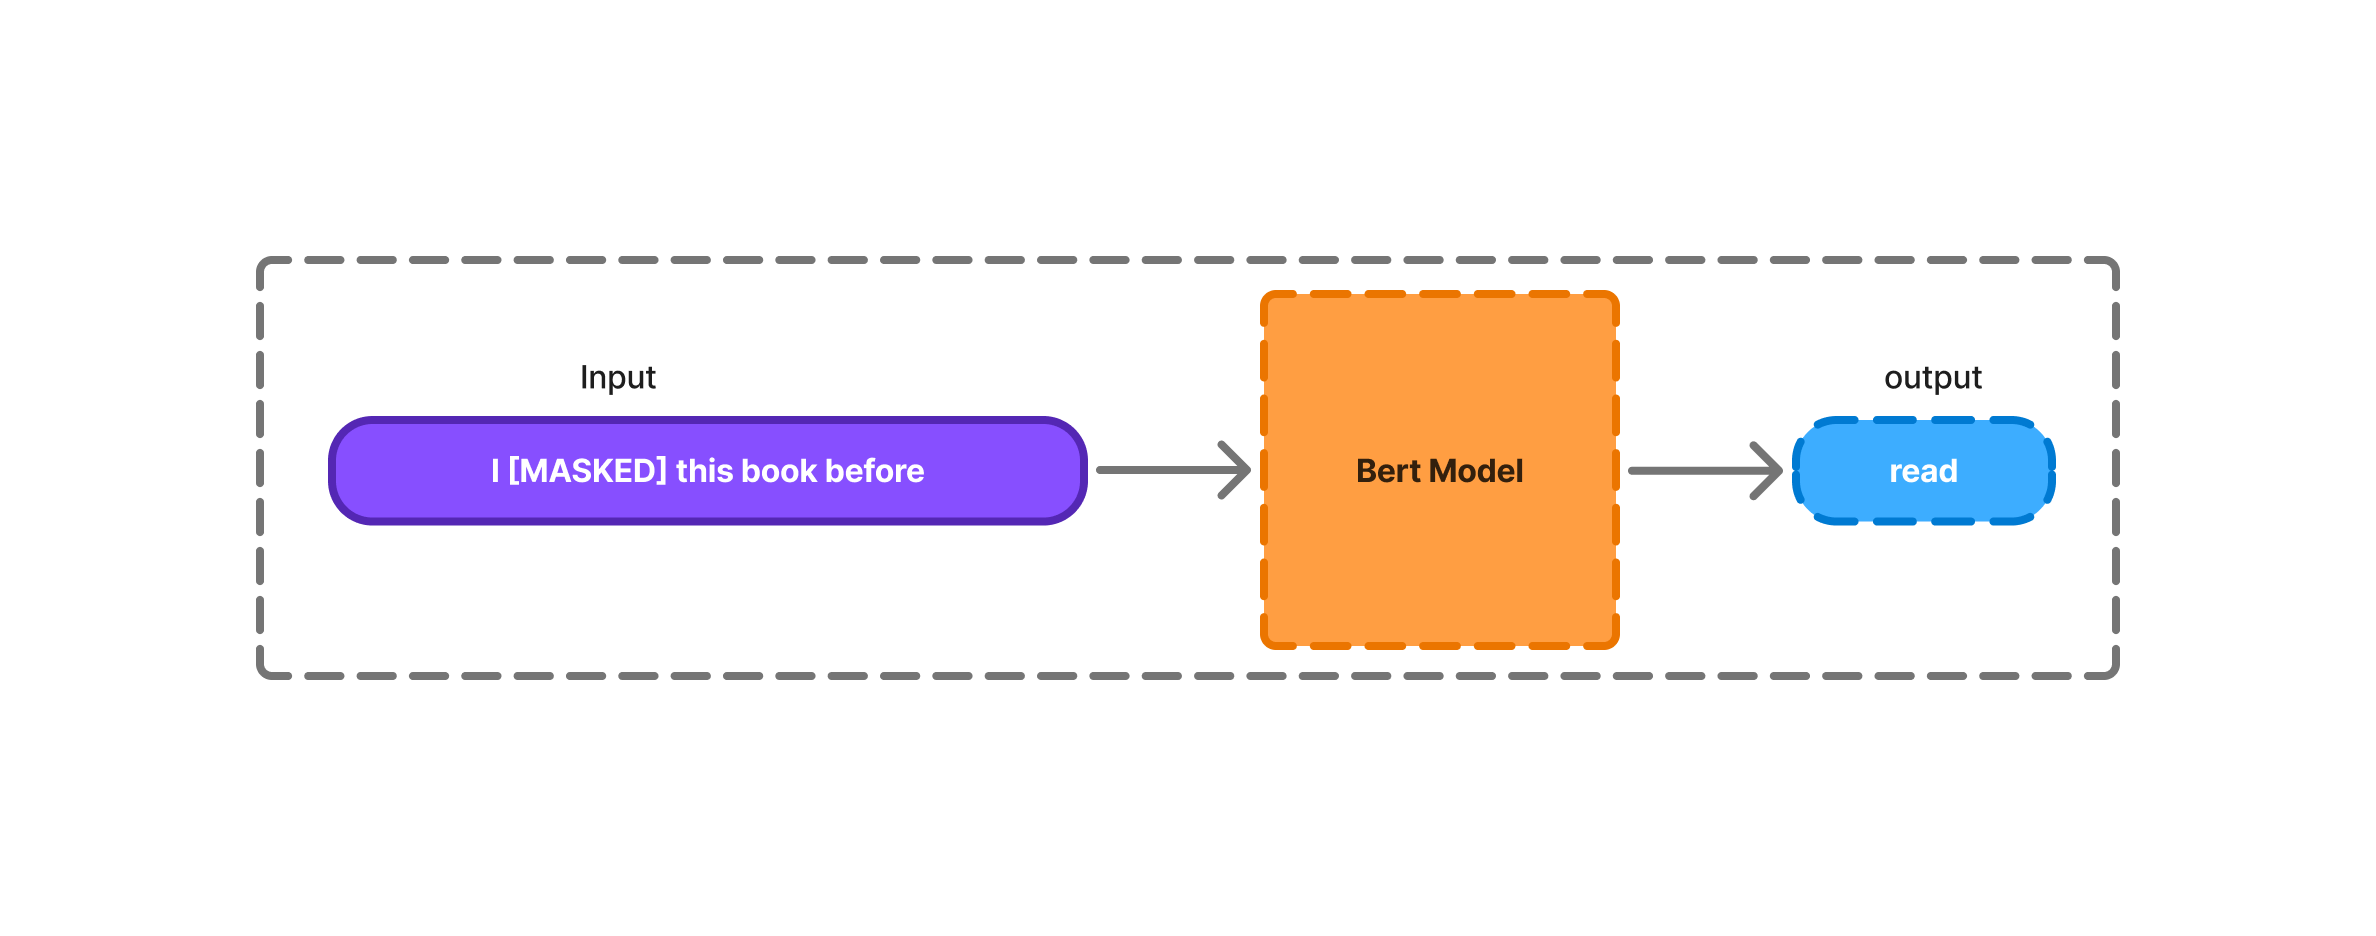

* As we said before in the pre-train phase, we train our model on masked lm task.

<center>

<img src="https://postimage.me/images/2025/05/21/image379c54bc33969035.png" width=600 />
</center>

## Load Dataset from HF 🤗


In [ ]:
# install datasets
! pip install -U datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda

In [ ]:
from datasets import load_dataset
from huggingface_hub import login
login()

In [ ]:
ds=load_dataset("atlasia/good25")
ds=ds["train"]
ds

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/338 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6 [00:00<?, ? examples/s]

Dataset({
    features: ['titles', 'content', 'images'],
    num_rows: 6
})

In [ ]:
ds.to_pandas()

,titles,content,images
0,من بينها بورش ورانج روفر.. الحرس المدني حبط ته...,كود – كازا ///\nقالت وكالة إيفي الإسبانية، إن ...,https://sf.goud.ma/wp-content/uploads/2025/03/...
1,رقم قياسي عالمي للدرون لي خداها المغرب من تركي...,أنس العمري – كود///\nطائرة (Akıncı) بدون طيار،...,https://sf.goud.ma/wp-content/uploads/2025/03/...
2,فرنسي مطلوب للأنتربول طيحوه بوليس تنغير بمعلوم...,أنس العمري-كود///\nأوقفت مصالح الشرطة القضائية...,https://sf.goud.ma/wp-content/uploads/2022/11/...
3,جودار طلب من لقجع العفو على المسيرين واللاعبين...,كود سبور//\nطلب محمد جودار نائب رئيس الجامعة ا...,https://sf.goud.ma/wp-content/uploads/2025/03/...
4,مبيعات الأسلحة الإسبانية للمغرب ف عام 2024 تضا...,كود – كازا ///\nقالت جريدة أوكدياريو الإسبانية...,https://sf.goud.ma/wp-content/uploads/2025/03/...
5,حتى إلى كانت هادي وحدة من أنجح الحكومات في تار...,محمد سقراط-كود///\nحتى إلى كانت هادي وحدة من أ...,https://sf.goud.ma/wp-content/uploads/2025/01/...


In [ ]:
# we will take only the content column
dataset=ds.select_columns(["content"])
dataset

Dataset({
    features: ['content'],
    num_rows: 6
})

In [ ]:
# split dataset train/test
dataset_splited=dataset.train_test_split(test_size=0.1)
dataset_splited

DatasetDict({
    train: Dataset({
        features: ['content'],
        num_rows: 5
    })
    test: Dataset({
        features: ['content'],
        num_rows: 1
    })
})

## Select Your BERT Model

- before data processing you need to select the bert model you want to train in huggingface, to do this follow the next steps:

<center>

<img src="https://postimage.me/images/2025/05/21/imagea3fd779942f6e46a.png" width=600 />
</center>

In [ ]:
from transformers import AutoConfig,AutoTokenizer,AutoModelForMaskedLM

In [ ]:
model_id="atlasia/XLM-RoBERTa-Morocco"
tokenizer=AutoTokenizer.from_pretrained(model_id)
#model_config=AutoConfig.from_pretrained(model_id) for RPT
model=AutoModelForMaskedLM.from_pretrained(model_id) # .from_config(model_config) for RPT

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/753 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

## Data Processing

* Before we begin training our model, we need to prepare the data for our task (MLM).

<center>

<img src="https://postimage.me/images/2025/05/21/image182633230a5a8183.png" width=600 />
</center>

#### Data Tokenization

In [ ]:
def ds_tokenizer(examples):
  return tokenizer(examples["content"])

In [ ]:
train_tokenized=dataset_splited["train"].map(ds_tokenizer).remove_columns(dataset_splited["train"].column_names)
eval_tokenized=dataset_splited["test"].map(ds_tokenizer).remove_columns(dataset_splited["test"].column_names)
train_tokenized,eval_tokenized

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (743 > 512). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

(Dataset({
     features: ['input_ids', 'attention_mask'],
     num_rows: 5
 }),
 Dataset({
     features: ['input_ids', 'attention_mask'],
     num_rows: 1
 }))

In [ ]:
train_tokenized.to_pandas().head()

,input_ids,attention_mask
0,"[0, 161323, 5818, 4297, 20767, 15010, 2977, 71...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[0, 161323, 46, 33149, 17113, 4666, 64, 90621,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[0, 161323, 46, 33149, 17113, 4666, 64, 90621,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[0, 2977, 2850, 167591, 9, 972, 7649, 64, 2076...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"[0, 862, 926, 92495, 179, 9, 972, 7649, 64, 20...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


#### Conctenate/Splite

In [ ]:
context_length = 256
def concatenate_splite(examples):
    # Concatenate all texts.
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    total_length = len(concatenated_examples["input_ids"])
    if total_length >= context_length:
        total_length = (total_length // context_length) * context_length
    # Split by chunks of context_length.
    result={"input_ids":[],"attention_mask":[]}
    for k,v in concatenated_examples.items():
      for i in range(0,len(v),context_length):
        result[k].append(v[i:i+context_length])
    return result

In [ ]:
train_ds=train_tokenized.map(concatenate_splite,batched=True)
eval_ds=eval_tokenized.map(concatenate_splite,batched=True)

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

#### DataCollator

In [ ]:
from transformers import DataCollatorForLanguageModeling

In [ ]:
data_collator=DataCollatorForLanguageModeling(tokenizer=tokenizer,mlm=True,mlm_probability=0.2) # mlm: how much i will mask in sentence (e.g 20%)

## Training

> After preparing our model and the data for training, the **training arguments** component remained to run our training

<center>

<img src="https://postimage.me/images/2025/05/21/image659b01ab94569319.png" width=600 />
</center>

#### Training Arguments

In [ ]:
# trainer
from transformers import TrainingArguments,Trainer
args=TrainingArguments(
    "model",
    learning_rate=2e-5,
    per_device_eval_batch_size=8,
    per_device_train_batch_size=4,
    num_train_epochs=1,
    save_total_limit=2,
    weight_decay=0.01,
    eval_steps=1000,
    logging_steps=1000,
    warmup_ratio=0.03,
    fp16=True,
    gradient_checkpointing=True,
    gradient_accumulation_steps=4,
    report_to="wandb",
    run_name="Bert CPT"
)

#### Trainer

In [ ]:
trainer=Trainer(
    model=model,
    tokenizer=tokenizer,
    data_collator=data_collator,
    train_dataset=train_ds,
    eval_dataset=eval_ds,
    args=args
)

<ipython-input-20-b2c03336a164>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer=Trainer(


#### Check GPU & Start Training

In [ ]:
! nvidia-smi # if the result is not found => there's no nvidia gpus

In [ ]:
trainer.train()

#### Push Model to the hub

In [ ]:
trainer.push_to_hub("abdeljalilELmajjodi/test-bert")

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.30k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/abdeljalilELmajjodi/model/commit/284169e2c18b482372374a251b8dc1e1756416de', commit_message='abdeljalilELmajjodi/test-bert', commit_description='', oid='284169e2c18b482372374a251b8dc1e1756416de', pr_url=None, repo_url=RepoUrl('https://huggingface.co/abdeljalilELmajjodi/model', endpoint='https://huggingface.co', repo_type='model', repo_id='abdeljalilELmajjodi/model'), pr_revision=None, pr_num=None)

## Show Your Work (Model Space) at Hugging Face

**In this final step, you will create a Gradio Space on Hugging Face to showcase your work. Follow these steps:**

1. **Clone the repository** from this [space](https://huggingface.co/spaces/atlasia/Masked-LM-Moroccan-Darija).

<cneter>

<img src="https://postimage.me/images/2025/05/21/image80ccae073a1228a0.png" width=600 />
</center>

2. **Open the code files** and **replace the model ID** with the ID of your own trained MLM model.

<center>

<img src="https://postimage.me/images/2025/05/21/image027b42faad20449f.png" width=600 />
</center>

3. **Update the example inputs** to be compatible with your model’s expected format (e.g., appropriate masked sentences).
4. **Save and commit your changes**, then save changes.